In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


In [2]:
# load the dataframe
df = pd.read_csv('data/89-90.csv')
df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,Id
0,1,Keith Acton,31,PHI,C,69,13,14,27,-2,...,2,0,14,0,0,94,13.8,NaN,NaN,actonke01
1,2,Greg Adams,26,VAN,LW,65,30,20,50,-8,...,0,1,14,6,0,181,16.6,NaN,NaN,adamsgr02
2,3,Greg Adams,29,TOT,LW,35,4,10,14,-2,...,0,0,9,1,0,27,14.8,NaN,NaN,adamsgr01
3,3,Greg Adams,29,DET,LW,28,3,7,10,0,...,0,0,7,0,0,19,15.8,NaN,NaN,adamsgr01
4,3,Greg Adams,29,QUE,LW,7,1,3,4,-2,...,0,0,2,1,0,8,12.5,NaN,NaN,adamsgr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,651,Zarley Zalapski,21,PIT,D,51,6,25,31,-14,...,0,2,11,14,0,85,7.1,NaN,NaN,zalapza01
770,652,Richard Zemlak,26,PIT,RW,19,1,5,6,-6,...,0,0,5,0,0,11,9.1,NaN,NaN,zemlari01
771,653,Rob Zettler,21,MNS,D,31,0,8,8,-7,...,0,0,7,1,0,21,0.0,NaN,NaN,zettlro01
772,654,Peter Zezel,24,STL,C,73,25,47,72,-9,...,0,3,20,27,0,158,15.8,NaN,NaN,zezelpe01


In [3]:
### Drop duplicate rows based on playerID
# players that have been traded have multiple rows
# keeping the first gives their total stats for the season
df = df.drop_duplicates(subset='Id', keep="first")
df

,Rk,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,SH,GW,EV.1,PP.1,SH.1,S,S%,TOI,ATOI,Id
0,1,Keith Acton,31,PHI,C,69,13,14,27,-2,...,2,0,14,0,0,94,13.8,NaN,NaN,actonke01
1,2,Greg Adams,26,VAN,LW,65,30,20,50,-8,...,0,1,14,6,0,181,16.6,NaN,NaN,adamsgr02
2,3,Greg Adams,29,TOT,LW,35,4,10,14,-2,...,0,0,9,1,0,27,14.8,NaN,NaN,adamsgr01
5,4,Jim Agnew,23,VAN,D,7,0,0,0,-1,...,0,0,0,0,0,3,0.0,NaN,NaN,agnewji01
6,5,Tommy Albelin,25,NJD,D,68,6,23,29,-1,...,0,0,14,9,0,125,4.8,NaN,NaN,albelto01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,651,Zarley Zalapski,21,PIT,D,51,6,25,31,-14,...,0,2,11,14,0,85,7.1,NaN,NaN,zalapza01
770,652,Richard Zemlak,26,PIT,RW,19,1,5,6,-6,...,0,0,5,0,0,11,9.1,NaN,NaN,zemlari01
771,653,Rob Zettler,21,MNS,D,31,0,8,8,-7,...,0,0,7,1,0,21,0.0,NaN,NaN,zettlro01
772,654,Peter Zezel,24,STL,C,73,25,47,72,-9,...,0,3,20,27,0,158,15.8,NaN,NaN,zezelpe01


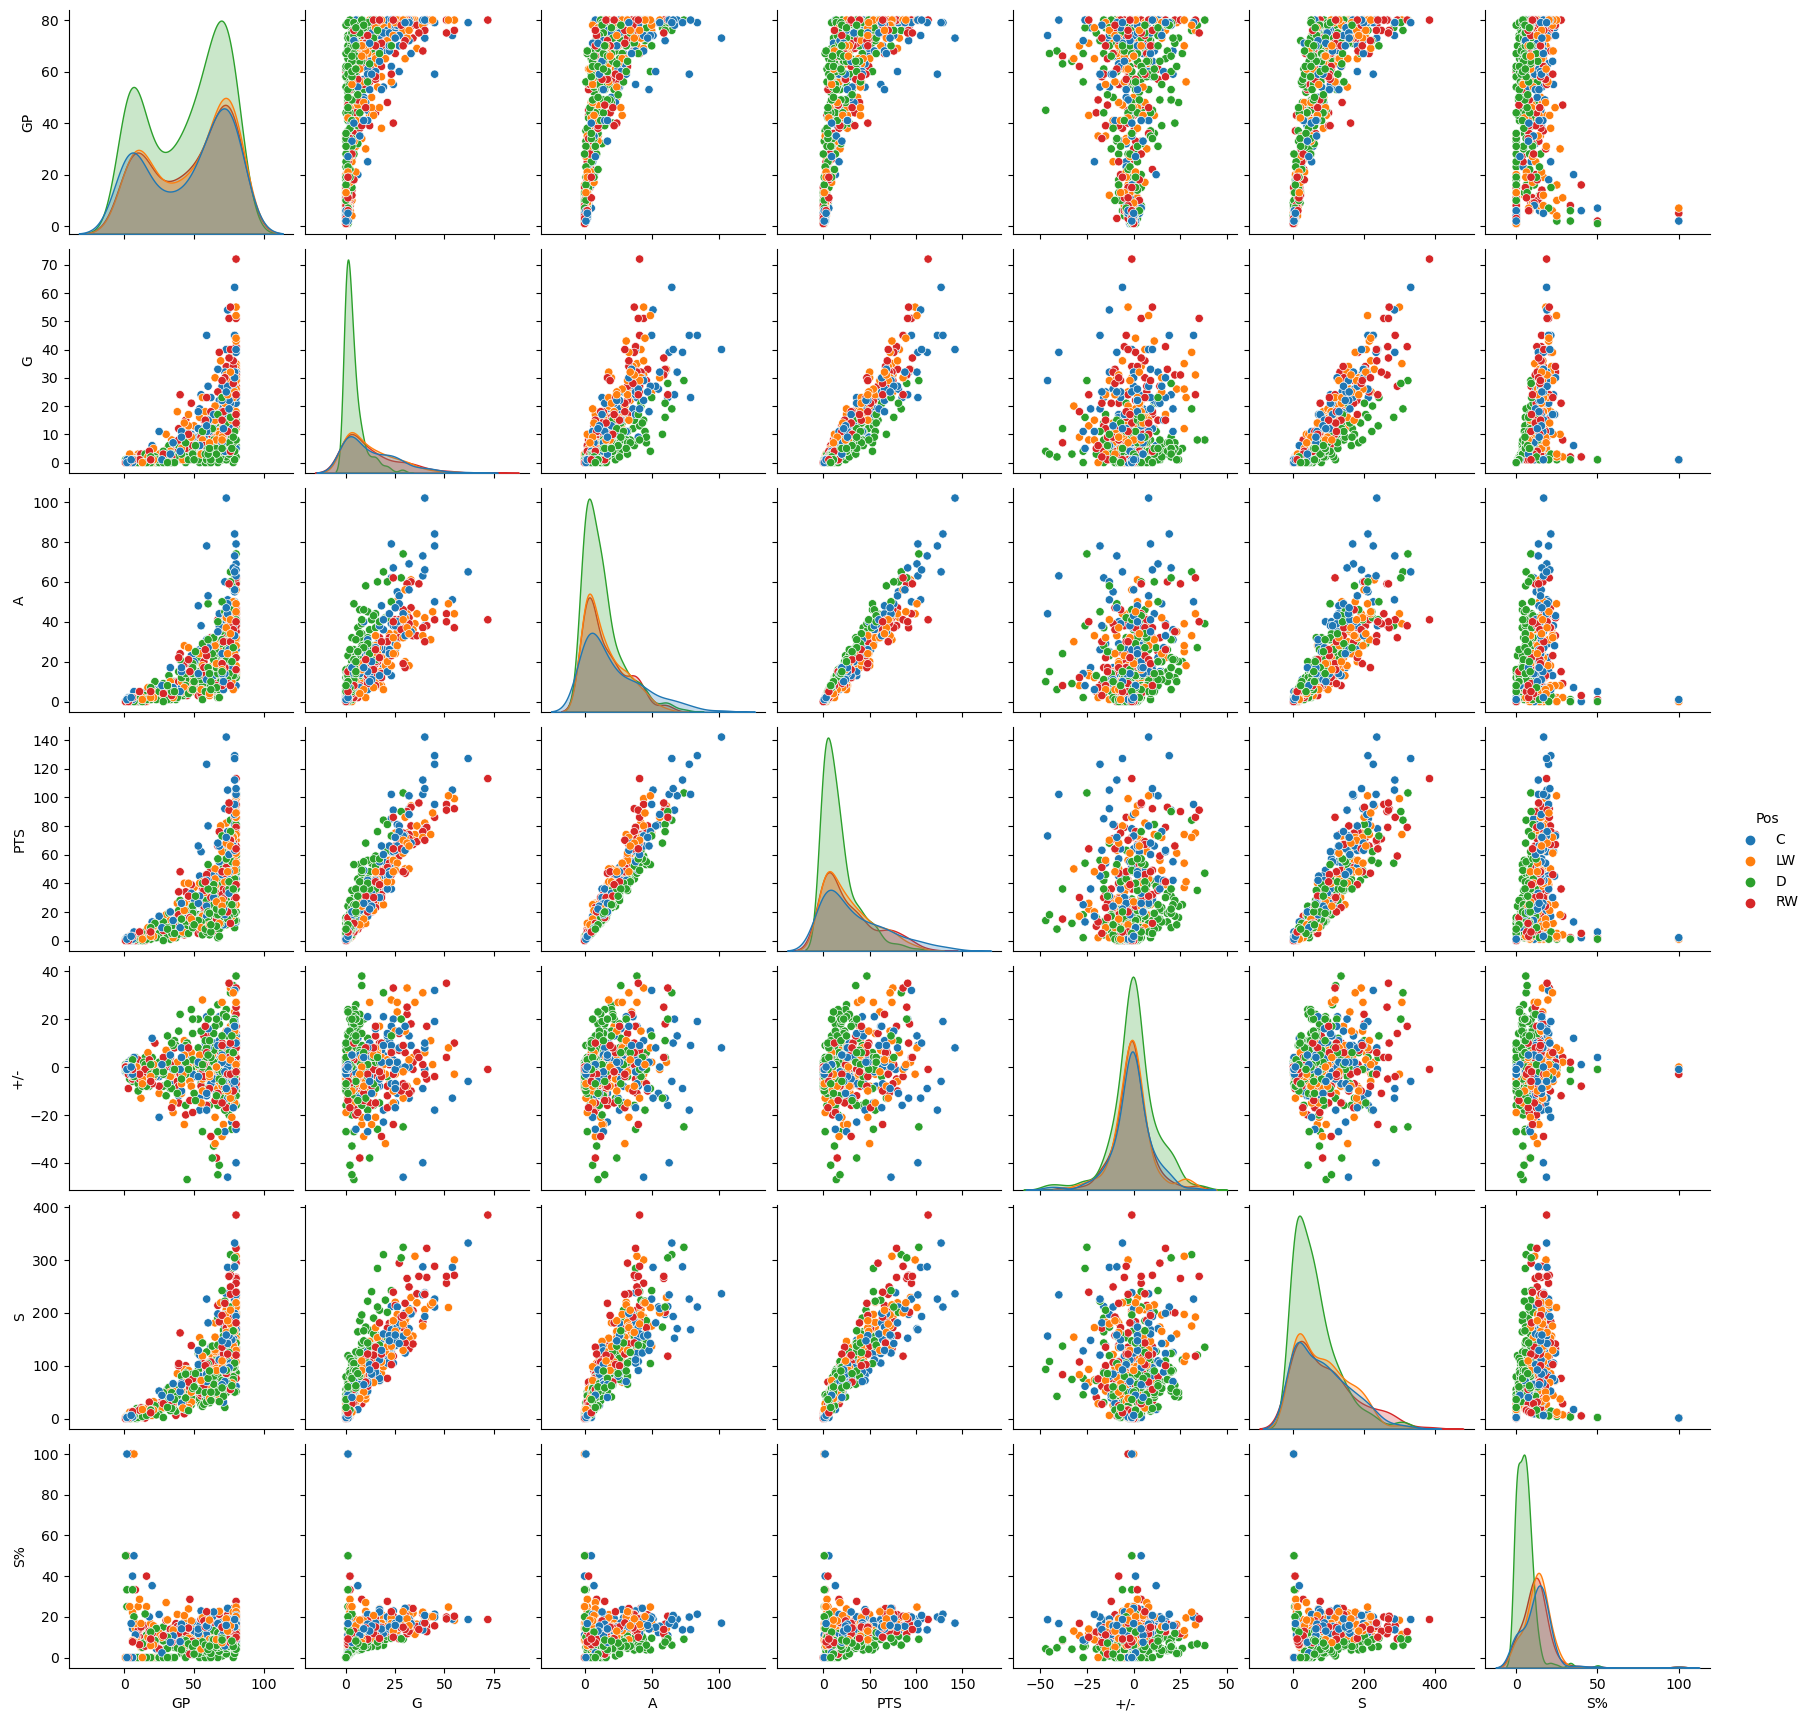

In [4]:
sns.pairplot(df, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')

In [5]:
df.isna().sum()

Rk          0
Player      0
Age         0
Tm          0
Pos         0
GP          0
G           0
A           0
PTS         0
+/-         0
PIM         0
PS          0
EV          0
PP          0
SH          0
GW          0
EV.1        0
PP.1        0
SH.1        0
S           0
S%         33
TOI       655
ATOI      655
Id          0
dtype: int64

In [6]:
players = df[['Player', 'Id']]

X = df.drop(['Rk', 'Player', 'Tm', 'Pos', 'Id', 'TOI', 'ATOI'], axis=1)

# X.fillna(method ='ffill', inplace = True)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
 
# # # Normalizing the data so that the data approximately
# # # follows a Gaussian distribution
# X_normalized = normalize(X_scaled)
 
# # # Converting the numpy array into a pandas DataFrame
# X_normalized = pd.DataFrame(X_normalized)

# pca = PCA(n_components = 2)
# X_principal = pca.fit_transform(X_normalized)
# X_principal = pd.DataFrame(X_principal)
# X_principal.columns = ['P1', 'P2']

In [21]:
pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="median")),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=671)),
    ('cluster', KMeans(n_clusters=2) ),
])

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6269399850590598


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5599219078362823


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5109953403444144


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4789914344769064


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4843109178162664


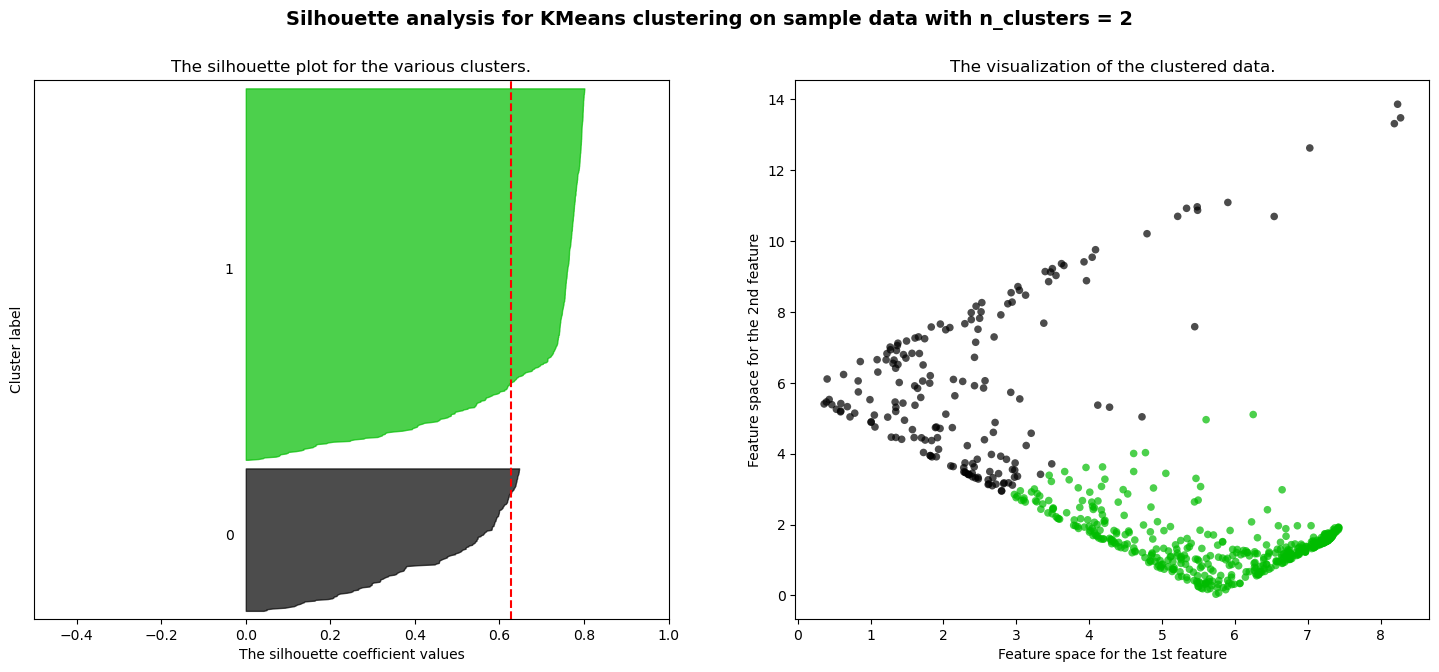

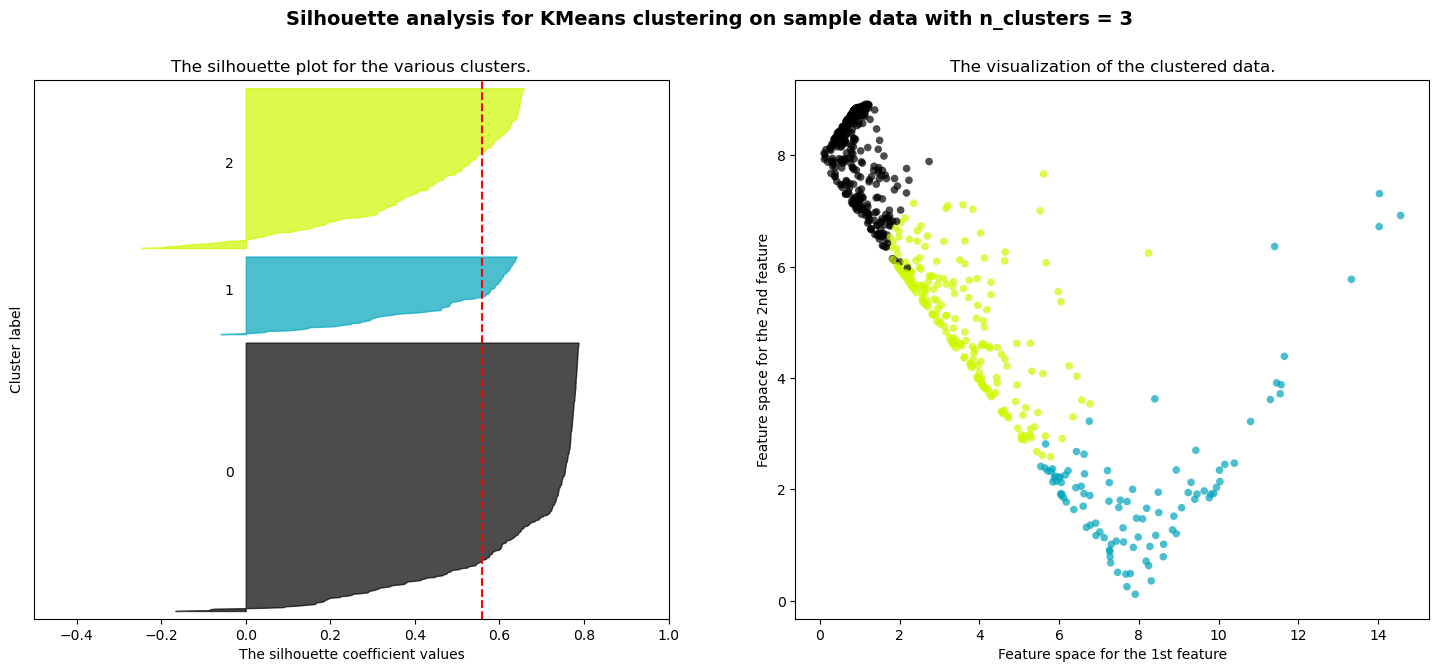

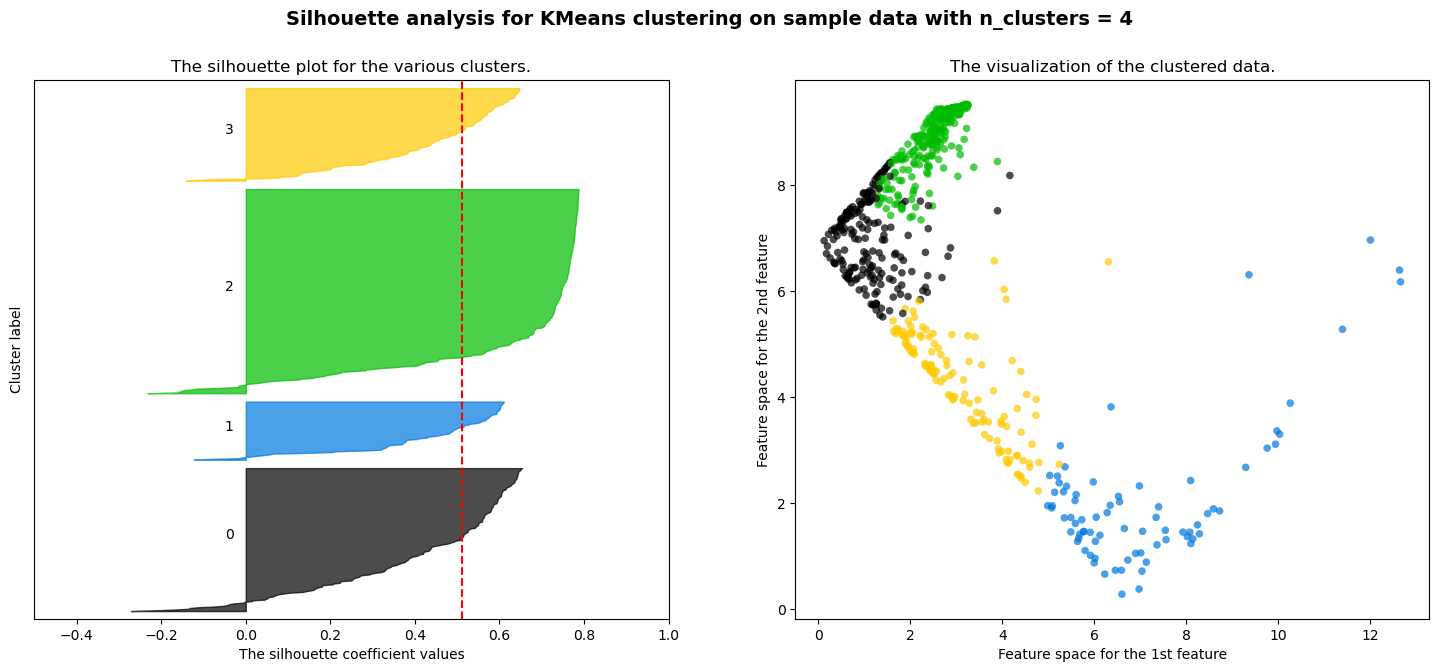

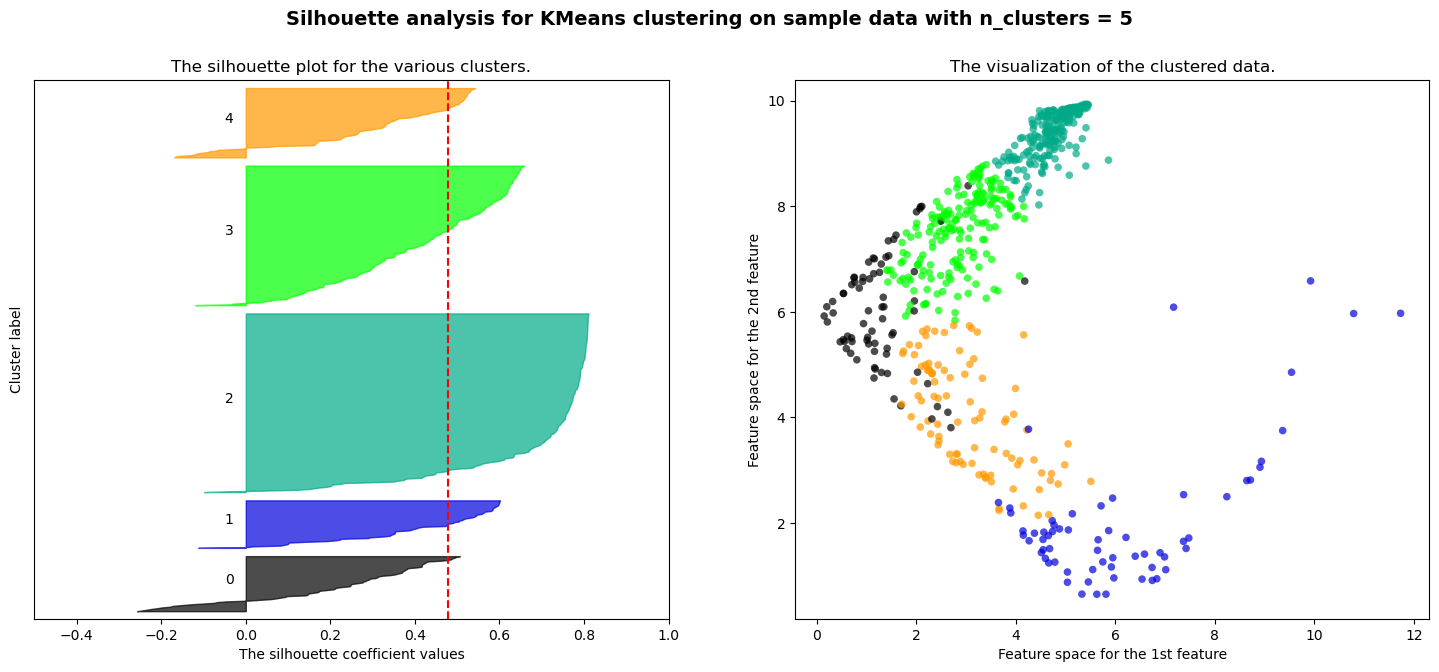

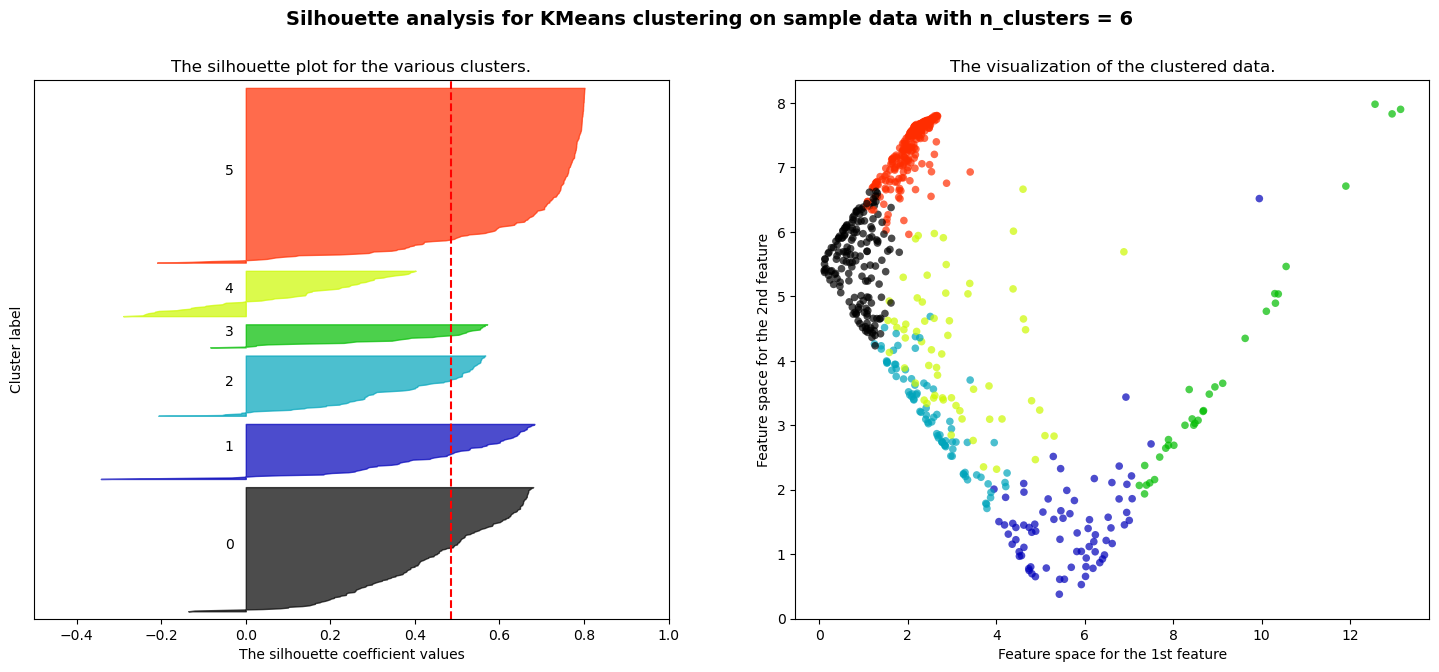

In [23]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    pipe = Pipeline([
        ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
        ('scale',StandardScaler()),
        ('pca', PCA(n_components=2,random_state=42)),
        ('cluster', KMeans(n_clusters=n_clusters) ),
    ])
    cluster_labels = pipe.fit_predict(X)
    Xtransformed = pipe.transform(X) # imputed and scaled, fed to pca, and return results
    clusterer = pipe.named_steps.cluster

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xtransformed[:, 0], Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     # print(centers)
    
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         print(c)
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [6]:
# df = pd.read_csv('data/90-91.csv')
# df